In [94]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix,log_loss,f1_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [17]:
yellowdf = pd.read_csv('data/yellow1.csv')

In [21]:
yellowdf.payment_type.value_counts()

NameError: name 'yellowdf' is not defined

In [18]:
greendf = pd.read_csv('data/green1.csv')

In [5]:
yellowdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5530349 entries, 0 to 5530348
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tip                    int64  
 1   car_type               object 
 2   pickup_datetime        object 
 3   dropoff_datetime       object 
 4   passenger_count        int64  
 5   trip_distance          float64
 6   ratecodeid             object 
 7   pickup_location_id     int64  
 8   dropoff_location_id    int64  
 9   payment_type           object 
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  week_of_month          int64  
 17  pickup_hour            int64  
 18  dropoff_hour           int64  
 19  day                    object 
 20  pickup_borough         object 
 21  pickup_zone            object 
 22  dropoff_borough   

In [6]:
greendf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393050 entries, 0 to 393049
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   tip                    393050 non-null  int64  
 1   car_type               393050 non-null  object 
 2   pickup_datetime        393050 non-null  object 
 3   dropoff_datetime       393050 non-null  object 
 4   ratecodeid             393050 non-null  object 
 5   pickup_location_id     393050 non-null  int64  
 6   dropoff_location_id    393050 non-null  int64  
 7   passenger_count        393050 non-null  int64  
 8   trip_distance          393050 non-null  float64
 9   fare_amount            393050 non-null  float64
 10  extra                  393050 non-null  float64
 11  mta_tax                393050 non-null  float64
 12  tolls_amount           393050 non-null  float64
 13  improvement_surcharge  393050 non-null  float64
 14  total_amount           393050 non-nu

## Correcting column order

Columns were stored differently from source, correcting the order to concatenate

In [19]:
cols = list(greendf.columns)

In [20]:
cols.insert(4, cols.pop(cols.index('passenger_count')))

In [21]:
greendf = greendf[cols]

In [22]:
cols.insert(5, cols.pop(cols.index('trip_distance')))

In [23]:
greendf = greendf[cols]

In [24]:
cols.insert(9, cols.pop(cols.index('payment_type')))
greendf = greendf[cols]

In [25]:
list(yellowdf.columns) == list(greendf.columns)

True

In [26]:
df = pd.concat([yellowdf, greendf])

In [18]:
df.shape

(5923399, 24)

In [19]:
yellowdf.shape

(5530349, 24)

In [20]:
greendf.shape

(393050, 24)

In [21]:
df.tip.value_counts()

1    5473524
0     449875
Name: tip, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8060793 entries, 0 to 393049
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tip                    int64  
 1   car_type               object 
 2   pickup_datetime        object 
 3   dropoff_datetime       object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   ratecodeid             object 
 7   pickup_location_id     float64
 8   dropoff_location_id    float64
 9   payment_type           object 
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  week_of_month          int64  
 17  pickup_hour            int64  
 18  dropoff_hour           int64  
 19  day                    object 
 20  pickup_borough         object 
 21  pickup_zone            object 
 22  dropoff_borough    

In [27]:
df.to_csv(r'/users/michaelharnett/desktop/metis/projects/taxi_tip_classification_metis4/data/totaldf.csv', index=False)

# Creating Dummy Columns

In [4]:
df = pd.read_csv('data/totaldf.csv')

In [5]:
# for some reason the concat switched some data types, or one of my saved csvs is old
# correcting data types for dummy columns

df.pickup_datetime, df.dropoff_datetime = pd.to_datetime(df.pickup_datetime), pd.to_datetime(df.dropoff_datetime)

df.week_of_month = df.week_of_month.astype(str)
df.pickup_hour = df.pickup_hour.astype(str)
df.dropoff_hour = df.dropoff_hour.astype(str)

In [6]:
# dropping location id columns since they are encoded in borough and zone
df.drop(columns=['pickup_location_id','dropoff_location_id',
                'pickup_zone','dropoff_zone'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923399 entries, 0 to 5923398
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tip                    int64         
 1   car_type               object        
 2   pickup_datetime        datetime64[ns]
 3   dropoff_datetime       datetime64[ns]
 4   passenger_count        int64         
 5   trip_distance          float64       
 6   ratecodeid             object        
 7   payment_type           object        
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  week_of_month          object        
 15  pickup_hour            object        
 16  dropoff_hour           object        
 17  day                    object        
 18  pickup_borough        

In [9]:
object_list = list(df.select_dtypes('object').columns)

In [10]:
object_list

['car_type',
 'ratecodeid',
 'payment_type',
 'week_of_month',
 'pickup_hour',
 'dropoff_hour',
 'day',
 'pickup_borough',
 'dropoff_borough']

In [11]:
finaldf = pd.get_dummies(data = df, columns = object_list, drop_first=True)

In [30]:
finaldf.to_csv(r'/users/michaelharnett/desktop/metis/projects/taxi_tip_classification_metis4/data/finaldf.csv', index=False)

In [34]:
#list(finaldf.columns)

In [12]:
# dropping the datetime columns for modeling
finaldf.drop(columns=['pickup_datetime','dropoff_datetime'],inplace=True)

In [13]:
finaldf.shape

(5923399, 86)

# Modeling - Logistic Regression
first model with no hyperperameter tuning or class weights.

In [3]:
finaldf = pd.read_csv('data/finaldf.csv')

In [14]:
finaldf.head(1)

,tip,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,car_type_yellow,...,pickup_borough_Manhattan,pickup_borough_Queens,pickup_borough_Staten Island,pickup_borough_Unknown,dropoff_borough_Brooklyn,dropoff_borough_EWR,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island,dropoff_borough_Unknown
0,1,1,1.5,7.0,0.5,0.5,0.0,0.3,9.95,1,...,1,0,0,0,0,0,1,0,0,0


In [26]:
logreg1 = LogisticRegression(max_iter=1000)
scaler = StandardScaler()

In [16]:
X, y = finaldf.iloc[:,1:], finaldf.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state=7)

In [17]:
scaler.fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

In [20]:
X_val_scaled = scaler.transform(X_val)

In [27]:
logreg1.fit(X_train_scaled, y_train)
logreg1.score(X_train_scaled, y_train)

0.9974721718022791

In [28]:
logreg1.score(X_val_scaled, y_val)

0.9974339062025188

In [29]:
preds1 = logreg1.predict(X_val)

In [30]:
matrix1 = confusion_matrix(y_val, preds1)

<AxesSubplot:>

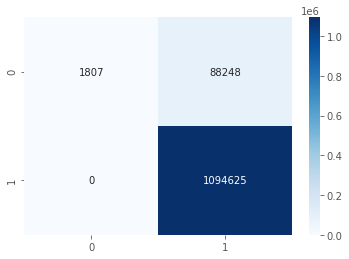

In [39]:
sns.heatmap(matrix1, annot=True, fmt='d', cmap='Blues')

In [33]:
df.shape

(5923399, 20)

In [35]:
df.tip.value_counts()

1    5473524
0     449875
Name: tip, dtype: int64

## Log Reg with weighted classes

In [96]:
logreg2 = LogisticRegression(C=.5, max_iter = 1000, class_weight={1:1, 0:13})

In [97]:
logreg2.fit(X_train_scaled, y_train)
logreg2.score(X_train_scaled, y_train)

0.994427185520474

In [83]:
logreg2.score(X_val_scaled, y_val)

0.9921675051490698

In [89]:
preds2 = logreg2.predict(X_val_scaled)

In [90]:
matrix2 = confusion_matrix(y_val, preds2)

<AxesSubplot:>

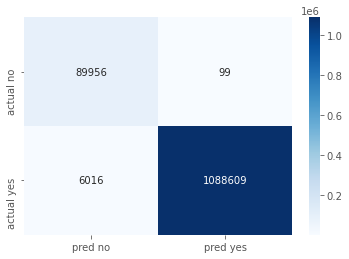

In [91]:
sns.heatmap(matrix2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['pred no', 'pred yes'],
           yticklabels=['actual no', 'actual yes'])

In [95]:
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, preds2), 
                                                     recall_score(y_test, preds2)))

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, logreg1.predict_proba(X_test))))

Precision: 0.9243,   Recall: 0.9191
Log-loss on logit: 2.5575


## Balanced Weight

In [46]:
logreg3 = LogisticRegression(max_iter =500, class_weight = 'balanced')

In [48]:
logreg3.fit(X_train_scaled, y_train)
print(logreg3.score(X_train_scaled, y_train))
print(logreg3.score(X_val_scaled, y_val))

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9946686009917167
0.9946913934564608


In [49]:
preds3 = logreg3.predict(X_val)

<AxesSubplot:>

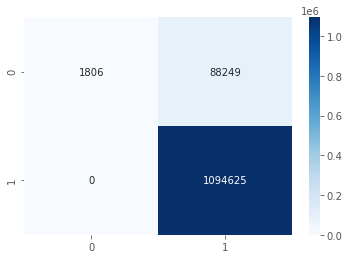

In [50]:
matrix3 = confusion_matrix(y_val, preds3)
sns.heatmap(matrix3, annot=True, cmap='Blues', fmt='d')

In [51]:
df.shape

(5923399, 20)

In [55]:
finaldf.to_csv(r'/users/michaelharnett/desktop/metis/projects/taxi_tip_classification_metis4/data/newdf.csv', index=False)

In [54]:
finaldf

,tip,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,car_type_yellow,...,pickup_borough_Manhattan,pickup_borough_Queens,pickup_borough_Staten Island,pickup_borough_Unknown,dropoff_borough_Brooklyn,dropoff_borough_EWR,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island,dropoff_borough_Unknown
0,1,1,1.50,7.0,0.5,0.5,0.0,0.3,9.95,1,...,1,0,0,0,0,0,1,0,0,0
1,1,1,2.60,14.0,0.5,0.5,0.0,0.3,16.30,1,...,1,0,0,0,0,0,1,0,0,0
2,1,1,1.30,6.5,0.5,0.5,0.0,0.3,9.05,1,...,1,0,0,0,0,0,1,0,0,0
3,1,1,3.70,13.5,0.5,0.5,0.0,0.3,18.50,1,...,1,0,0,0,0,0,0,1,0,0
4,1,2,2.10,10.0,0.5,0.5,0.0,0.3,13.00,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923394,1,1,3.33,13.0,0.5,0.5,0.0,0.3,18.39,0,...,0,0,0,0,0,0,0,1,0,0
5923395,1,1,0.72,4.0,0.5,0.5,0.0,0.3,6.36,0,...,1,0,0,0,0,0,1,0,0,0
5923396,0,1,1.75,7.0,0.5,0.5,0.0,0.3,8.30,0,...,1,0,0,0,0,0,1,0,0,0
5923397,1,1,0.57,5.0,0.5,0.5,0.0,0.3,7.30,0,...,1,0,0,0,0,0,1,0,0,0
